In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import os.path
from os import path
import seaborn as sns
from scipy import signal

In [147]:
## 1, -- KDP_nu
KDP_nu_name=["CIR40" ,"CIR50"]
KDP_nu=[1,1.25]

## 2,  --  KDP_w_sat_1  -- -
KDP_w_sat_1_name=["0_33" ,"0_66" ,"1_00"]
KDP_w_sat_1=[0.33, 0.66 ,1.00]

## 3,  --  KDP_w_sat_2  -- -
KDP_w_sat_2_name=["ImmunEscp_Jul" ,"ImmunEscp_Sep", "ImmunEscp_Nov"]
KDP_w_sat_2=[380, 442 ,503]

## 4,  --  KDP_g_1  -- -
KDP_g_1_name=["0_33", "0_66" ,"1_00"]
KDP_g_1=[0.33, 0.66, 1.00]

## 5,  --  KDP_g_2  -- -
KDP_g_2_name=["ABW150Days" ,"ABW180Days"]
KDP_g_2=[150 ,180]

## 6,  --  KDP_c_p  -- -
KDP_c_p_name=["Vaccine_PresentRate", "Vaccine_BestWeekAvg", "Vaccine_TwicePresent"]
KDP_c_p=[1 ,1.5, 2]

KDP_lambda_name=["SD_RA","SD_RAR","SD_RARF"]
KDP_lambda=[0,0.1,0.2]

### CODE FOR OBTAINING DATE VALUES ####################
start ="2020-07-01"
end  = "2022-06-30"

start = datetime.datetime.strptime(start, "%Y-%m-%d")
end = datetime.datetime.strptime(end, "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]



for i in range(len(date_generated)):
    date_generated[i] = date_generated[i].strftime("%d-%b-%y")


def ReadDF(fname,colString):
    df_master = pd.DataFrame()
    dateOfPeak = []
    dayOfPeak = []
    numAtPeak = []
    vaccRate = []
    numRead = 0
    for i in range(len(KDP_nu)):
            for j in range(len(KDP_w_sat_1)):
                for k in range(len(KDP_w_sat_2)):
                    for l in range(len(KDP_g_1_name)):
                        for m in range(len(KDP_g_2)):
                            for n in range(len(KDP_c_p)):
                                for o in range(len(KDP_lambda)):
                                    if(path.exists(KDP_nu_name[i] + "_" + KDP_w_sat_1_name[j] + "_" + KDP_w_sat_2_name[k] + "_" + \
                                                KDP_g_1_name[l] + "_" + KDP_g_2_name[m] + "_" + KDP_c_p_name[n] + "_" + \
                                                KDP_lambda_name[o]+"/PopulationData/"+ fname)):
                                        df_temp = pd.read_csv(KDP_nu_name[i] + "_" + KDP_w_sat_1_name[j] + "_" + KDP_w_sat_2_name[k] + "_" + \
                                                KDP_g_1_name[l] + "_" + KDP_g_2_name[m] + "_" + KDP_c_p_name[n] + "_" + \
                                                KDP_lambda_name[o]+"/PopulationData/"+fname, delim_whitespace=True, header=1).transpose().loc[colString:]

                                        

                                        ExptId = KDP_nu_name[i] + "_" + KDP_w_sat_1_name[j] + "_" + KDP_w_sat_2_name[k] + "_" + \
                                                KDP_g_1_name[l] + "_" + KDP_g_2_name[m] + "_" + KDP_c_p_name[n] + "_" + \
                                                KDP_lambda_name[o]
                                        VaccineRt = str(KDP_c_p_name[n])
                                        CIR = str(KDP_nu_name[i]) 
                                        SD = str(KDP_lambda_name[o])
                                        KDPwsat = str(KDP_w_sat_2_name[k])

                                        numRead+=1


                                        df_temp['ID'] = ExptId
                                        df_temp['Vaccine Rate'] = VaccineRt
                                        df_temp['CIR'] = CIR
                                        df_temp['SD'] = SD
                                        df_temp['KDPwsat2']=KDPwsat
                                        df_temp['Scenario'] = numRead
                                        
                                                                
                                        df_master = pd.concat([df_master,df_temp])


    print(str(numRead) + " samples have been read ")
    return df_master
                                    

In [148]:



#### - Read the Nucleation Data
df_nucleation_total = ReadDF("CovidNucleation.data","Total")
df_nucleation_11 = ReadDF("CovidNucleation_11Yrs.data","Total")
df_nucleation_18 = ReadDF("CovidNucleation_18Yrs.data","Total")
df_nucleation_45 = ReadDF("CovidNucleation_45Yrs.data","Total")
df_nucleation_60 = ReadDF("CovidNucleation_60Yrs.data","Total")
df_nucleation_60plus = ReadDF("CovidNuclthegreaeation_Above60Yrs.data","Total")


## Read the VaccinationData
#### Read the Vaccination and the Antibody plots

df_antibody = ReadDF("Covid_Vaccinated.data","AntiBody")
df_Vaccinated = ReadDF("Covid_Antibody.data","AntiBody")


972 samples have been read 
972 samples have been read 
972 samples have been read 
972 samples have been read 
972 samples have been read 
0 samples have been read 
972 samples have been read 
972 samples have been read 


In [6]:
################# --- READ THE MASTER DATA ------------- ####################################

df_active= ReadDF("CovidPopulation.data","Total")

972 samples have been read 


In [10]:
################ THIVIN ####################################
### Compute New dataframes for the ratio Quantities    -- Nucleation_age/Nucleation_Total

############# HARDCODED ##########################
##  Total of 730 days simulated 
ROWS = 730

### getList of columns
listOfCols = list(df_nucleation_total.columns.values)

#### create a copy of all the dataframes to store the ratio values
df_nucleation_11_ratio = df_nucleation_11.copy(deep=True)
df_nucleation_18_ratio = df_nucleation_18.copy(deep=True)
df_nucleation_45_ratio = df_nucleation_45.copy(deep=True)
df_nucleation_60_ratio = df_nucleation_60.copy(deep=True)
df_nucleation_60plus_ratio = df_nucleation_60plus.copy(deep=True)


##### Compute Ratios ##################

for i in range(ROWS + 1):
    df_nucleation_11_ratio[[i]] =  df_nucleation_11_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 
    df_nucleation_18_ratio[[i]] =  df_nucleation_18_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 
    df_nucleation_45_ratio[[i]] =  df_nucleation_45_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 
    df_nucleation_60_ratio[[i]] =  df_nucleation_60_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 
    df_nucleation_60plus_ratio[[i]] =  df_nucleation_60plus_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 

    
## remove the NA values
df_nucleation_11_ratio = df_nucleation_11_ratio.replace(np.nan,0)
df_nucleation_18_ratio = df_nucleation_18_ratio.replace(np.nan,0)
df_nucleation_45_ratio = df_nucleation_45_ratio.replace(np.nan,0)
df_nucleation_60_ratio = df_nucleation_60_ratio.replace(np.nan,0)
df_nucleation_60plus_ratio = df_nucleation_60plus_ratio.replace(np.nan,0)



KeyError: "None of [Int64Index([0], dtype='int64')] are in the [columns]"

In [479]:

def plot_histo(df,X,hue,bw):
    df_plot=df
    df_plot.dropna(subset=['Date Of Peak'],inplace=True)
    sns.set(rc={'figure.figsize':(20,15)})
    sns.histplot(data=df_plot,x=X, hue=hue, binwidth=bw,multiple='dodge',fill=True)
    
    
def plot_violin(X,Y,df,hue,scale,cut,bandwidth):
    df_plot = df
    df_plot.dropna(subset=['Date Of Peak'],inplace=True)
    df_plot = df_plot.loc[df_plot[Y]< 4000000]
    sns.set(rc={'figure.figsize':(15,10)})
    sns.violinplot(x=X,y=Y,data=df_plot,hue=hue,split=True,scale=scale,cut=cut,bw=bandwidth)

def plot_catplot(X,Y,df,hue,scale,cut,bandwidth,xticks):
    df_plot = df
    df_plot.dropna(subset=['Date Of Peak'],inplace=True)
    df_plot = df_plot.loc[df_plot[Y]< 4000000]
#     sns.set(rc={'figure.figsize':(15,10)})
    fig = sns.catplot(x=X, y=Y,
                hue=hue, col="Vaccine Rate",data=df_plot,
                kind="violin", split=True,
                height=4, aspect=.9,scale=scale,cut=cut,bw=bandwidth);
    fig.set_xticklabels(xticks)

def timeSeriesPlot(X,Y,df,hue,scale,cut):
    df_plot = df
    df_plot.dropna(subset=['Date Of Peak'],inplace=True)
    df_plot = df_plot.loc[df_plot[Y]< 10]
    print(df_plot)
#     sns.set(rc={'figure.figsize':(15,10)})
    sns.catplot(x=X, y=Y,
                hue=hue, col="Vaccine Rate",data=df_plot,
                kind="violin", split=True,
                height=4, aspect=.9,scale=scale,cut=cut,bw=bandwidth);

In [625]:
##########--- Compute MeanData ----- ######
import scipy

def AddMeanInfo(df):
    meanval = []
    minval = []
    maxval = []
    for i in range(731):
        meanval.append(np.mean(df[i]))
        minval.append(np.min(df[i]))
        maxval.append(np.max(df[i]))
    df.append(minval)
    df.append(maxval)
    df.append(meanval)
    

### Compute the Peak in the signal #####
## 1, DataFrame
## 2, DateNUmber (0 to 730) to be assigned for NoPeak Scenario
## 3, NUmber of Peak value for No Peak
def AddPeakInfo(df_master,Wave3NoPeakDateNumber,NoWave_ActiveCase):
    dateOfPeak = []
    numAtPeak = []
    dateString = [] 
    noiseDate = 0;
    noiseNum = 0;
    

    
    for ia in range(len(df_master)):
        dop = scipy.signal.find_peaks(df_master.iloc[[ia]].transpose().loc[0:730,'Total'],distance = 20)
        for ib in range(len(dop[0])):
            if (dop[0][ib]>365):
                dateOfPeak.append(dop[0][ib])
                numAtPeak.append(df_master.iloc[ia,dop[0][ib]])
                dateString.append(date_generated[dop[0][ib]])
                break
            if(ib)==len(dop[0])-1:
                #print("Scenario " + str(ia) + " Does Not Have a Peak ")
                dateOfPeak.append(Wave3NoPeakDateNumber)
                numAtPeak.append(NoWave_ActiveCase)
                dateString.append(date_generated[int(Wave3NoPeakDateNumber)])
    df_master['Date Of Peak'] = dateOfPeak
    df_master['Number At Peak'] = numAtPeak
    df_master['DateString'] = dateString
    df_master['LogNumAtPeak'] = numpy.log10(numAtPeak)
    return df_master
        
        
    

In [626]:
### -- Compute the Peak Data of the Time Series --- #####

df_active = AddPeakInfo(df_active,670,1)

### -- Compute the Mean Data of the Time Series --- #####
# df_active = AddMeanInfo(df_active)


In [604]:
#FUNCTION DEFINITION ONLY

####################################_____[[ DATA GENERERATOR ]] FOR NUMBER OF CASES ______________________ #################################

from scipy.stats import norm
import numpy
import sklearn
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn import preprocessing
import matplotlib.patches as mpatches


def GenerateData(df_active,YColumn,Bandwidth,N_bins,LinePLotVals_Cases,LinePLotX_Cases):
    fig, ax = plt.subplots(3,2,figsize=(11,8))
    fig.tight_layout(pad=3.0)
    colors = ['navy', 'green', 'darkorange']
    kernel = 'epanechnikov'
    KDPCIR=["CIR= 40", "CIR= 50"]
    KDPImm=["EEscape Period - July","Escape Period - September", "Escape Period  - November"]
    legend = ["Present Rate","1.5x Present Rate","2x Present Rate"]
    

    for i in range(3):
        for j in range(2):
            df_kde=df_active.copy(deep=True)
            df_kde=df_kde[df_kde['CIR']==KDP_nu_name[j]]
            df_kde=df_kde[df_kde['KDPwsat2']==KDP_w_sat_2_name[i]]
            df_kde.dropna(subset=[YColumn],inplace=True)
            
            for k in range(3):
                df_kdep = df_kde.copy(deep=True)
                df_kdep = df_kdep[df_kdep['Vaccine Rate']==KDP_c_p_name[k]]

                hist = sns.histplot(ax=ax[i,j],data=df_kdep,x=YColumn,stat='probability',kde=True,label=legend[k], \
                                    kde_kws={"bw_adjust":Bandwidth},color=colors[k],bins=N_bins)
                
                
                ## Read the Data From the above Plot
                ll = hist.get_lines()[k].get_data()
                LinePLotVals_Cases[i][j][k] = np.asarray(ll[1])
                LinePLotX_Cases[i][j][k] = np.asarray(ll[0])
                
                
                ax[i,j].containers[0].remove() # remove the bars
                ax[i,j].legend(loc='upper right')
                blue_patch=mpatches.Patch(color='navy',label='Vaccination At Present Rate')
                green_patch=mpatches.Patch(color='green',label='Vaccination At Present Rate+50%')
                orange_patch=mpatches.Patch(color='darkorange',label='Vaccination At Present Rate+100%')
                ax[i,j].legend(handles=[blue_patch,green_patch,orange_patch])
                ax[i,j].set_title(KDPImm[i]+", "+ KDPCIR[j])
                ax[i,j].set_xlabel("Number of cases at peak")
    #             ax[i,j].set_xlim([1,5e6])
    #             ax[i,j].set_ylim([0,0.7])
                handles, labels = ax[i,j].get_legend_handles_labels()
                ax[i,j].get_legend().remove()
    fig.legend(handles, labels, loc='lower center',title='Vaccination Rate',fancybox=True,ncol=3,bbox_to_anchor=(0.5,0.97))
    plt.tight_layout()

    plt.show()




No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


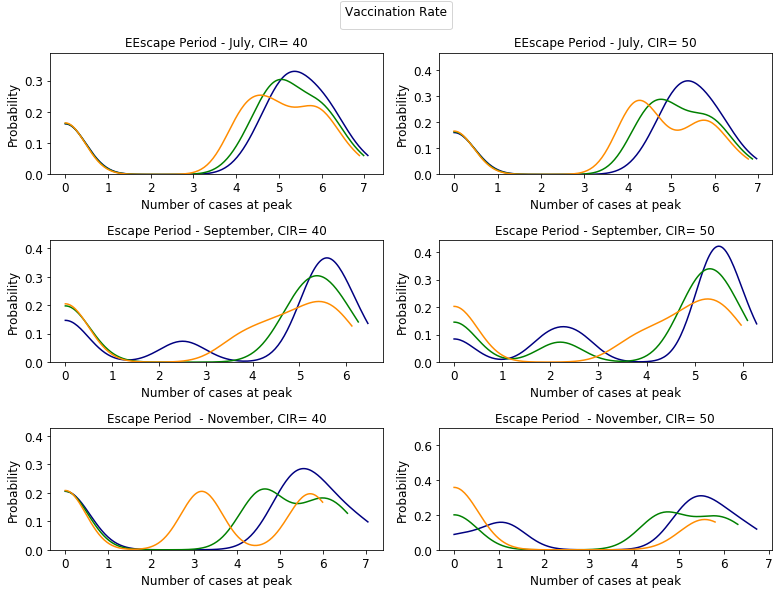

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


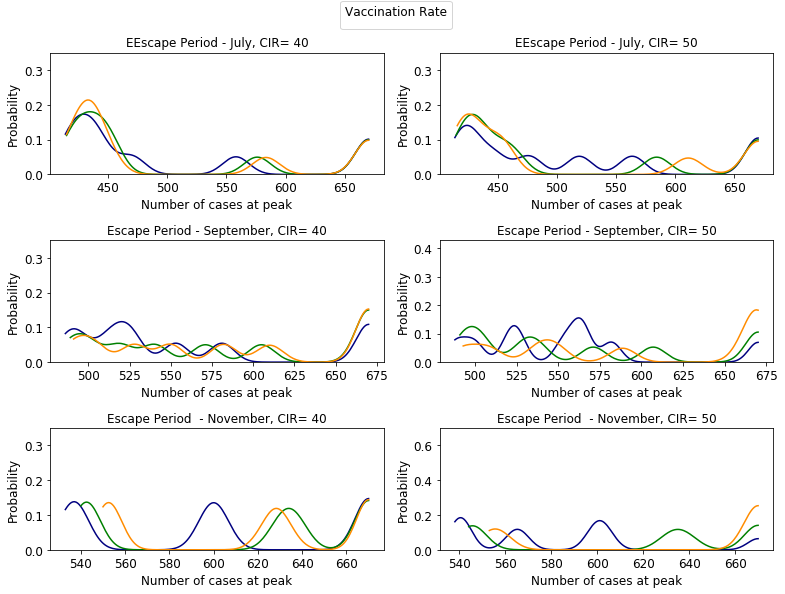

In [618]:
############### GENERATE THE DATASET FOR PLOTTING SCRIPT #####################################
## For Number of Cases    
LinePLotVals_Cases = np.empty(shape=(4,4,4,200))
LinePLotX_Cases = np.empty(shape=(4,4,4,200))

## For Date of Peak
LinePLotVals = np.empty(shape=(4,4,4,200))
LinePLotX = np.empty(shape=(4,4,4,200))
    
### Data for Number at Peak
GenerateData(df_active,'LogNumAtPeak',0.45,8,LinePLotVals_Cases,LinePLotX_Cases)

### Data for Day of Peak
GenerateData(df_active,'Date Of Peak',0.25,20,LinePLotVals,LinePLotX)

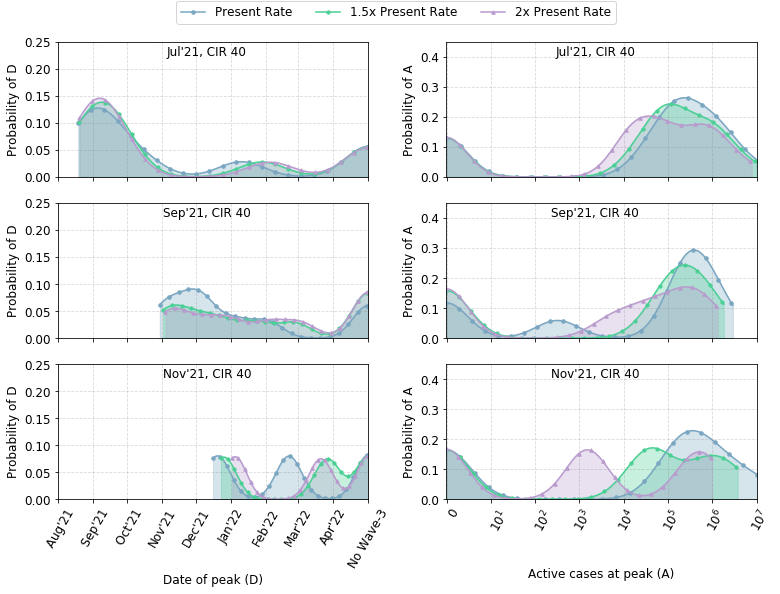

<Figure size 432x288 with 0 Axes>

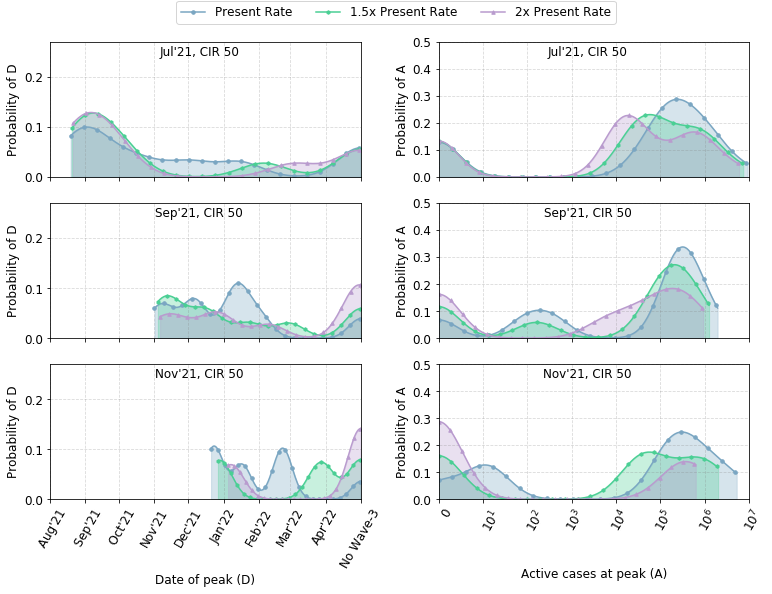

<Figure size 432x288 with 0 Axes>

In [609]:
###################### ____________________ PLOTTING SCRIPT _______________ ####################################
####  Input parameter -- DataFrame
####  Generates the 2*3 plot for Each CIR Scenario  [Num at Peak for 3 Immune Escape Variants] [Date of Peak for Immune Escape variants]

def CIR_plotter():
    for cirv in range(2):
        ## 0 - cir40, 1-cir50
        CIRVARIANT = cirv;

        ####### -- PLotter Parameters -- ######
        plt.rcParams["text.usetex"] = False
        plt.rcParams["font.family"] = "serif"
        plt.rcParams["font.serif"] = ["Computer Modern"]
        plt.rcParams['xtick.labelsize'] = 12
        plt.rcParams['ytick.labelsize'] = 12

        SMALL_SIZE = 12
        MEDIUM_SIZE = 12
        BIGGER_SIZE = 12

        plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
        plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
        plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
        plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

        ## Set plotting parameters   -- Day of Peak
        markersizep = 1.5
        xtl = []
        xt = [396,427,457,488,518,549,580,608,639,670]   ## 1st days of the months hardcoded 
        xtl = ['   Aug\'21','   Sep\'21','   Oct\'21','Nov\'21','Dec\'21', 'Jan\'22','Feb\'22','Mar\'22','Apr\'22','No Wave-3']
    #     for tickIndex in range(len(xt)):
    #         xtl.append(date_generated[xt[tickIndex]]);
    #         pass;


        ## Set plotting parameters   -- Number at Peak
        markersizep = 3.5
        nTicks_C = 10
        startDay_C = 0
        endDay_C = 4e6
        xt_C = [0.01,1,2,3,4,5,6,7]
        xtl_C = ["        0",r"         $10^{1}$",r"         $10^{2}$",r"    $10^{3}$",r"    $10^{4}$",r"    $10^{5}$",r"    $10^{6}$",r"    $10^{7}$"];

        ## COMMON PLOTTING PARAMETERS
        markeveryVal = 9
        alphaVal = 0.3

        if(CIRVARIANT==0):
            y_limCol1_Val = 0.25
            y_limCol2_Val = 0.45
        else:
            y_limCol1_Val = 0.27
            y_limCol2_Val = 0.5      

        fig, ax = plt.subplots(3,2,figsize=(11,8),sharex=False,sharey=False)
        fig.tight_layout()

        colorVal = ['#7aa6c2','#4acf94','#b99bce']
        marker  = ['o','h','^']
        legend = ["Present Rate","1.5x Present Rate","2x Present Rate"]
        KDPImm = ["Jul'21", "Sep'21","Nov'21" ]
        KDPCIR = ["CIR 40", "CIR 50"]

        j=CIRVARIANT;
        col=0
        for i in range(3):
            for k in range(3):
        #             print( "(i,j) = (", str(i) ,"," ,str(j),") ",   " K val : " , str(k) )
        #            sns.lineplot(ax=ax[i,j],data=LinePLotVals[i][j][k],label=KDP_c_p_name[k])
                ax[i,col].plot(LinePLotX[i][j][k],LinePLotVals[i][j][k],label = legend[k],linewidth=1.5,color=colorVal[k],marker=marker[k],markersize=markersizep,markevery=markeveryVal)
                #ax[i,j].containers[0].remove() # remove the bars
                #ax[i,j].relim() # the axis limits need to be recalculated without the bars
                #ax[i,j].autoscale_view()
                ax[i,col].fill_between(LinePLotX[i][j][k],LinePLotVals[i][j][k],0, alpha=alphaVal, color=colorVal[k])


            ax[i,col].legend(title='Vaccination Rate',fancybox=True,loc='upper right')
    #         ax[i,col].set_title(KDPImm[i] +", "+ KDPCIR[j], y=10.0, pad=-14)
            ax[i,col].text(.48,.9,KDPImm[i] +", "+ KDPCIR[j],horizontalalignment='center',transform=ax[i,col].transAxes)
            ax[i,col].set_ylabel("""Probability of D""")
            ax[i,col].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            ax[i,col].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
            ax[i,col].set_xlim(right=endDay-50)
            ax[i,col].set_ylim((0,y_limCol1_Val))
            ax[i,col].set_xticks(xt);
            ax[i,col].set_xticklabels([]);
            handles, labels = ax[i,col].get_legend_handles_labels()
            ax[i,col].get_legend().remove()

        ax[2,col].set_xlabel("""Date of peak (D)""")
        ax[2,col].set_xticks(xt);
        ax[2,col].set_xticklabels(xtl);
        ax[2,col].tick_params(axis='x', rotation=60);


        ### --- NUMBER OF CASES ----- ######

        col=1

        for i in range(3):
            for k in range(3):
                ax[i,col].plot(LinePLotX_Cases[i][j][k],LinePLotVals_Cases[i][j][k],label = legend[k],linewidth=1.5,color=colorVal[k],marker=marker[k],markersize=markersizep,markevery=markeveryVal)
                ax[i,col].fill_between(LinePLotX_Cases[i][j][k],LinePLotVals_Cases[i][j][k],0, alpha=alphaVal, color=colorVal[k])


            ax[i,col].legend(title='Vaccination Rate',fancybox=True,loc='upper right')
    #         ax[i,col].set_title(, position=(0.5, 4.6))
            ax[i,col].text(.48,.9,KDPImm[i] +", "+ KDPCIR[j],horizontalalignment='center',transform=ax[i,col].transAxes)
    #         ax[i,col].set_ylabel("""1""")
            ax[i,col].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            ax[i,col].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
            ax[i,col].set_xlim(left=startDay_C,right=endDay_C)
            ax[i,col].set_xticks(xt_C);
            ax[i,col].set_xticklabels([]);
            ax[i,col].set_ylim((0,y_limCol2_Val))
            ax[i,col].set_ylabel("""Probability of A""")
            ax[i,col].set_xlim((0,7))
            handles, labels = ax[i,col].get_legend_handles_labels()
            ax[i,col].get_legend().remove()

        ax[2,col].set_xlabel("""Active cases at peak (A)""")
    #     ax[2,col].yaxis.set_label_coords(-0.075,.5)
        ax[2,col].set_xticks(xt_C);
        ax[2,col].set_xticklabels(xtl_C);
        ax[2,col].tick_params(axis='x', rotation=60);



        fig.legend(handles, labels, loc='lower center',title='',fancybox=True,ncol=3,bbox_to_anchor=(0.5,0.98))
        plt.tight_layout()

        if(CIRVARIANT==0): 
            plt.savefig("CIR40_NoWave3.pdf",dpi=600,bbox_inches='tight')
            plt.savefig("CIR40_NoWave3.png",dpi=600,bbox_inches='tight')
        else:
            plt.savefig("CIR50_NoWave3.pdf",dpi=600,bbox_inches='tight')
            plt.savefig("CIR50_NoWave3.png",dpi=600,bbox_inches='tight')

        plt.show()
        plt.draw()



In [711]:
###################### __________ SCATTER PLOT DATA GENERATOR ______________________________ ##############################
from scipy.stats import norm
import numpy
import sklearn
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn import preprocessing
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

def SCATTER_plotter():
    
    fig, ax = plt.subplots(3,2,figsize=(11,8),sharex=True,sharey=True)

    ####### -- PLotter Parameters -- ######
    plt.rcParams["text.usetex"] = True
    plt.rcParams["text.usetex"] = True
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = ["Computer Modern"]
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12

    plt.rcParams["font.serif"]
    SMALL_SIZE = 12
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 12

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


    xtl = []
    xt = [396,427,457,488,518,549,580,608,639,670]   ## 1st days of the months hardcoded 
    xtl = ['   Aug\'21','   Sep\'21','   Oct\'21','Nov\'21','Dec\'21', 'Jan\'22','Feb\'22','Mar\'22','Apr\'22','No wave-3']



    ## Set plotting parameters   -- Number at Peak
    markersizep = 1.9
    nTicks_C = 10
    startDay_C = 0
    endDay_C = 4e6
    xt_C = [1e-2,1e0,1e2,1e4,1e6,1e8,1e9]
    xtl_C = ["0",r"$10^{0}$",r"$10^{2}$",r"$10^{4}$",r"$10^{6}$",r"$10^{8}$",r"$10^{9}$"];


    #### PLotting Colors and other Parameters 
    colorVal = ['#7aa6c2','#4acf94','#b99bce']
    marker  = ['o','h','^']
    kernel = 'epanechnikov'
    KDPCIR=["CIR 40", "CIR 50"]
    KDPImm = ["Jul'21", "Sep'21","Nov'21" ]
    Vacc=["Present Rate","1.5x Present Rate","2x Present Rate"]
    JitterDate = 0.025
    JitterNum = 0.00000009
    #LinePLotVals = np.empty(shape=(4,4,4,200))

    for i in range(3):
        for j in range(2):
            df_kde=df_active.copy(deep=True)
            df_kde=df_kde[df_kde['CIR']==KDP_nu_name[j]]
            df_kde=df_kde[df_kde['KDPwsat2']==KDP_w_sat_2_name[i]]
            df_kde.dropna(subset=['Date Of Peak'],inplace=True)

            ## Add Jitters to the Current Dataframe
            stdev_DOP = JitterDate * (max(df_kde['Date Of Peak']) - min(df_kde['Date Of Peak']))
            df_kde['Date Of Peak'] =  df_kde['Date Of Peak'] + np.random.randn(len(df_kde['Date Of Peak'])) * stdev_DOP

            stdev_Case = JitterNum * (max(df_kde['Number At Peak']) - min(df_kde['Number At Peak']))
            df_kde['Number At Peak'] =  df_kde['Number At Peak'] + np.random.randn(len(df_kde['Number At Peak'])) * stdev_Case
            for k in range(3):
                df_kdep = df_kde.copy(deep=True)
                df_kdep = df_kdep[df_kdep['Vaccine Rate']==KDP_c_p_name[k]]   
                scat = sns.scatterplot(ax=ax[i,j],x='Date Of Peak',y='Number At Peak',data=df_kdep,y_jitter=0.2,label=Vacc[k],\
                                       size='Number At Peak', sizes=(40, 250),marker=marker[k],s=50, \
                                       palette=colors,markers=True,color=colorVal[k],legend="auto")
                plt.yscale(value="log")

                ax[i,j].set_xticks(xt);
                ax[i,j].set_xticklabels(xtl);
                ax[i,j].set_yticks(xt_C);
                ax[i,j].set_yticklabels(xtl_C);
                ax[i,j].tick_params(axis='x', rotation=60)
                ax[i,j].text(.48,.9,KDPImm[i] +", "+ KDPCIR[j],horizontalalignment='center',transform=ax[i,j].transAxes)
                ax[i,j].legend(title='Vaccination Rate',fancybox=True,ncol=2)
                handles, labels = ax[i,j].get_legend_handles_labels()
                ax[i,j].set_ylim([1e-2,1e9])
                ax[i,j].get_legend().remove()
    #             ax.legend(..., ncol=2)
            ax[i,j].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
            ax[i,j].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)


    ## Add the y labels in 1st Column
    ax[0,0].set_ylabel("Active cases at peak")
    ax[1,0].set_ylabel("Active cases at peak")
    ax[2,0].set_ylabel("Active cases at peak")

    ## Add the x axis labels in last row
    ax[2,0].set_xlabel("Date of peak")
    ax[2,1].set_xlabel("Date of peak")

    ## shorten the labels from the  full list of labels
    LabelShort = [labels[0],labels[6],labels[11]]
    handlesShort = [handles[0],handles[6],handles[11]]
    plt.legend(handlesShort, LabelShort, loc='upper center',title='',fancybox=True,ncol=3,bbox_to_anchor=(-0.1,3.45))
    plt.subplots_adjust(wspace=0.04, hspace=0.085)



    plt.show()







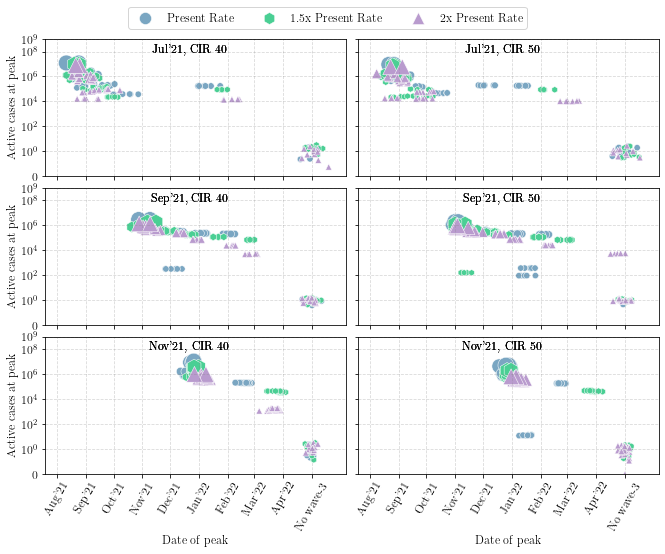

In [712]:
################### PLOT THE CIR PLOTS #####################################
# CIR_plotter();
SCATTER_plotter()